In [1]:
import pandas as pd

import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [2]:
# load data
df = pd.read_csv('shopping_behavior_updated.csv')


In [3]:
#prepare data

# map freq to numeric
frequency_map = {
    'Weekly': 52,
    'Fortnightly': 26,
    'Monthly': 12,
    'Quarterly': 4,
    'Annually': 1
}
df['Frequency_Numeric'] = df['Frequency of Purchases'].map(frequency_map)

features = ['Age', 'Purchase Amount (USD)', 'Frequency_Numeric']
X = df[features].copy()

# standarize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)

/var/folders/dy/ypdslq3j27b8qsqchnzr7dhr0000gn/T/ipykernel_9269/1822292761.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['age_group', 'Gender']).size().unstack()


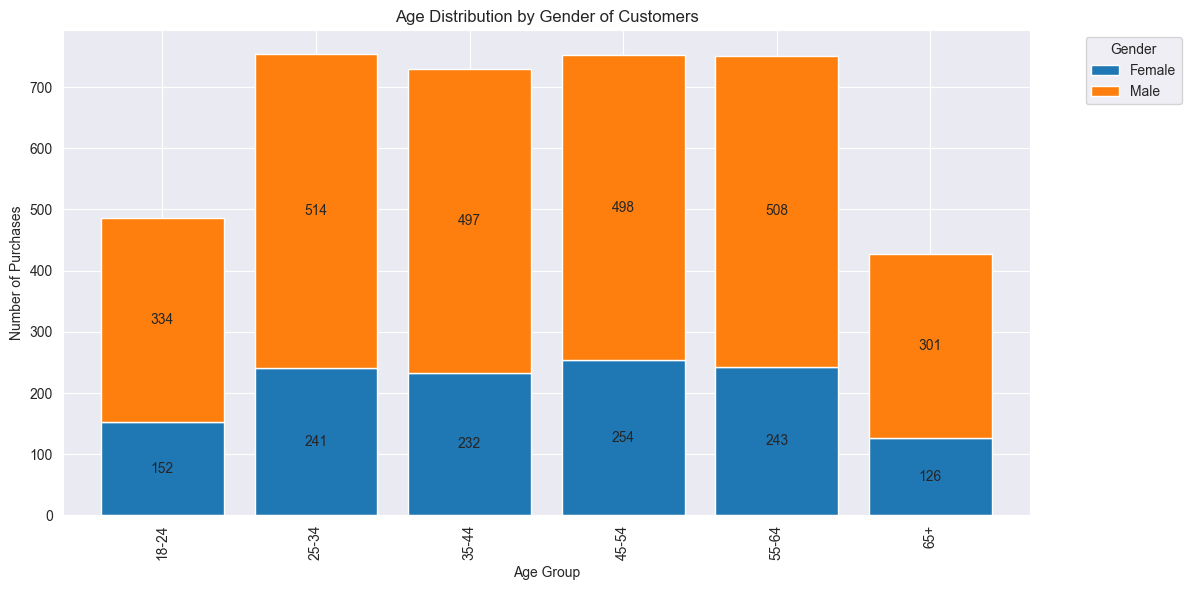

In [4]:
# visualization age/gender graph

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('shopping_behavior_updated.csv')

bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
grouped = df.groupby(['age_group', 'Gender']).size().unstack()
ax = grouped.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.8)

plt.title('Age Distribution by Gender of Customers')
plt.xlabel('Age Group')
plt.ylabel('Number of Purchases')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.show()

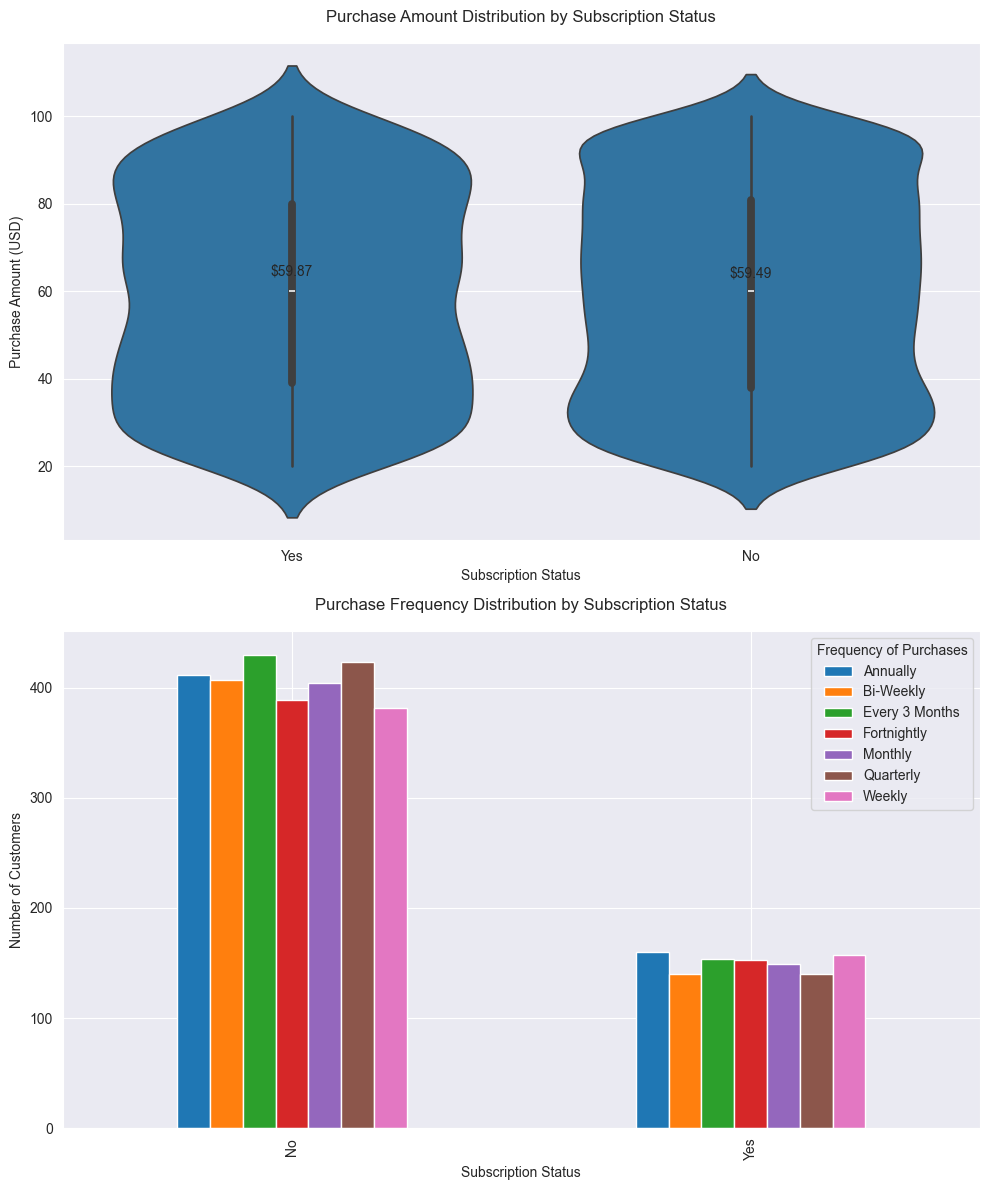

In [5]:

#subscription analysis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# violin plot of purchase amounts
sns.violinplot(x='Subscription Status', y='Purchase Amount (USD)', data=df, ax=ax1)

ax1.set_title('Purchase Amount Distribution by Subscription Status', pad=15)
ax1.set_xlabel('Subscription Status')
ax1.set_ylabel('Purchase Amount (USD)')

avg_purchase = df.groupby('Subscription Status')['Purchase Amount (USD)'].mean()
for i, v in enumerate(avg_purchase):
    # depending on your data's range
    ax1.text(i, v + (v * 0.05), f'${v:.2f}',
             horizontalalignment='center',
             verticalalignment='bottom')

#  freq comparison bar plot
purchase_freq = df.groupby(['Subscription Status', 'Frequency of Purchases']).size().unstack()
purchase_freq.plot(kind='bar', ax=ax2)
ax2.set_title('Purchase Frequency Distribution by Subscription Status', pad=15)
ax2.set_xlabel('Subscription Status')
ax2.set_ylabel('Number of Customers')
ax2.legend(title='Frequency of Purchases')

plt.tight_layout()